<a href="https://colab.research.google.com/github/Niko1909/Contexto-Like/blob/main/contexto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import string
import numpy as np
from numpy.linalg import norm
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import nltk
from nltk.stem import WordNetLemmatizer as wnl
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
data = open('/content/glove.6B.50d.txt', 'r') # 50-dim GloVe word vectors

In [5]:
print(data.read(100))

the 0.418 0.24968 -0.41242 0.1217 0.34527 -0.044457 -0.49688 -0.17862 -0.00066023 -0.6566 0.27843 -0


In [6]:
# build and clean embeddings (only take lemmatized words, no punctuation in word, no numbers in word)
embeddings = {}
for word in data:
  word_vec = word.split()
  if wnl().lemmatize(word_vec[0]) == word_vec[0] and all(char not in word_vec[0] for char in string.punctuation + '0123456789'):
    embeddings[word_vec[0]] = np.asarray(word_vec[1:], dtype=np.float32)

In [7]:
# identify bad data (wrong shape)
for key, val in embeddings.items():
  if val.shape != (50,):
    print(key)

In [8]:
len(embeddings)

307535

In [9]:
embeddings['a'].shape == (50,)

True

In [10]:
def contexto(word, similarity, num_words=15):
  """
  Prints the top num_words most similar words to the word inputted, using one of
  three vector similarity metrics.

  word: the term that the other words similarities are ranked on
  similarity: the similarity metric to use: one of dot product, euclidean
  distance, or cosine similarity
  num_words: the number of similar words to show in the ranking
  """
  lem_word = wnl().lemmatize(word)
  if lem_word not in embeddings.keys():
    print(f'{lem_word} does not have an embedding')
    return
  if num_words > len(embeddings):
    print(f'num_words is greater than the number of embeddings! choose a num_words <= {len(embeddings)}')
    return

  if similarity == 'dot':
    sorted_words = sorted(embeddings.keys(), reverse=True, key=lambda word1: np.dot(embeddings[word1], embeddings[word]))
  elif similarity == 'euclidean':
    sorted_words = sorted(embeddings.keys(), key=lambda word1: spatial.distance.euclidean(embeddings[word1], embeddings[word]))
  elif similarity == 'cosine':
    sorted_words = sorted(embeddings.keys(), reverse=True, key=lambda word1: np.dot(embeddings[word1], embeddings[word])/(norm(embeddings[word1])*norm(embeddings[word])))
  else:
    print(f'{similarity} is not one of dot, euclidean, or cosine')
    return

  print(f'The top {num_words} most similar words to {lem_word}:')
  for i in range(1, num_words+1):
    print(f'{i}. {sorted_words[i]}')
  return

In [11]:
contexto('the', 'euclidean')

the does not have an embedding


In [12]:
contexto('a', 'euclidean', 1000000)

num_words is greater than the number of embeddings! choose a num_words <= 307535


In [13]:
contexto('contract', 'euclidean', 15)

The top 15 most similar words to contract:
1. deal
2. signed
3. signing
4. option
5. sale
6. purchase
7. lease
8. expired
9. agreeing
10. transfer
11. for
12. acquisition
13. considering
14. terminated
15. agreed


In [14]:
contexto('bicycle', 'dot', 15)

The top 15 most similar words to bicycle:
1. bike
2. motorcycle
3. car
4. truck
5. driver
6. bus
7. wheel
8. cart
9. vehicle
10. passenger
11. motorized
12. riding
13. biking
14. racing
15. motorbike


In [15]:
contexto('contract', 'cosine', 15)

The top 15 most similar words to contract:
1. deal
2. signed
3. signing
4. option
5. agreement
6. lease
7. sale
8. loan
9. purchase
10. expired
11. for
12. transfer
13. acquisition
14. agreed
15. payment


In [16]:
# next stuff can do: visualizations (to explain why euclidean and cosine are similar and dot isn't)

In [41]:
tSNE = TSNE(n_components=2, random_state=0, perplexity=5)
words = ['boy', 'girl', 'man', 'woman', 'grandpa', 'grandma', 'aunt', 'uncle', 'father', 'mother', 'male', 'female']
vectors = np.array([embeddings[word] for word in words])
Y = tSNE.fit_transform(vectors)

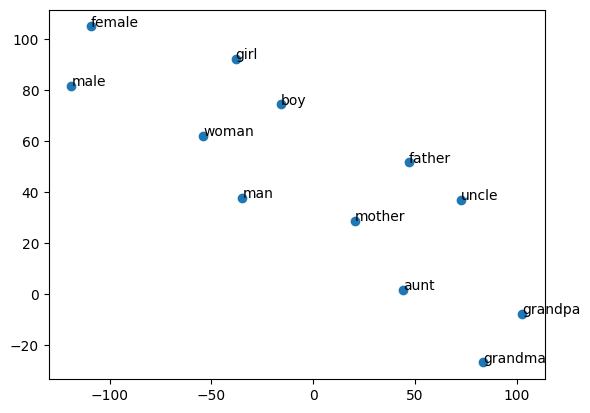

In [42]:
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

In [43]:
contexto('male', 'cosine', 15)

The top 15 most similar words to male:
1. female
2. adult
3. young
4. woman
5. age
6. older
7. child
8. men
9. sex
10. offspring
11. girl
12. blind
13. teenage
14. person
15. unmarried
